In [1]:
import moda
from moda import QEHCParameters, QEHCSolver
import sys
import faulthandler
faulthandler.enable()
for _ in range(1):
    params = QEHCParameters()
    solver = QEHCSolver()
    
    ds1 = moda.DataSet('linear_d8n400_7')
    print(solver.Solve(ds1, params))

(2.2388938702988526e-08, 0.0, 113, -1, 2706124)


In [2]:
import numpy as np
data = np.array([[2.0,3.0],[3.0,4.0]])

ds2 = moda.DataSet(data)

print(ds2)



2 3 
3 4 



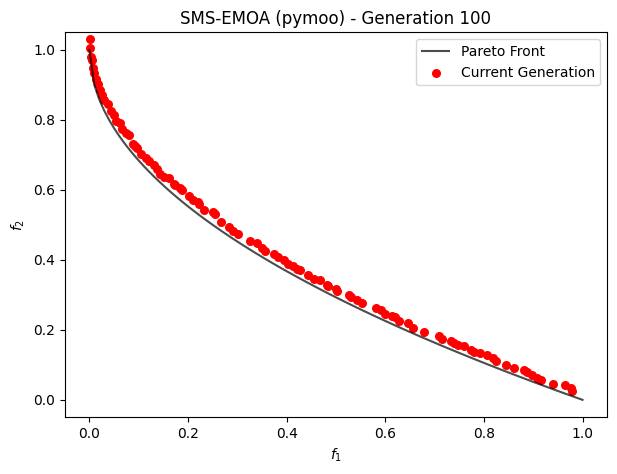

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.optimize import minimize
from pymoo.problems import get_problem

# 1. Setup Problem and Run Optimization once
problem = get_problem("zdt1",  n_pareto_points= 100)
algorithm = SMSEMOA()
res = minimize(problem, algorithm, ('n_gen', 100), seed=1, save_history=True)

# 2. Setup the Figure for Animation
fig, ax = plt.subplots(figsize=(7, 5))
pf = problem.pareto_front()
ax.plot(pf[:, 0], pf[:, 1], color="black", alpha=0.7, label="Pareto Front")
scatter = ax.scatter([], [], color="red", s=30, label="Current Generation")

ax.set_title("SMS-EMOA Convergence (WFG1)")
ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.legend()

# 3. Define the Update Function
def update(frame):
    # Get the population objectives at this generation
    F = res.history[frame].opt.get("F")
    scatter.set_offsets(F)
    ax.set_title(f"SMS-EMOA (pymoo) - Generation {frame + 1}")
    return scatter,

# 4. Create and Show Animation
# interval is delay between frames in milliseconds
ani = FuncAnimation(fig, update, frames=len(res.history), interval=50, blit=True)
ani.save('smsemoa.mp4')
plt.show()

0
0
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


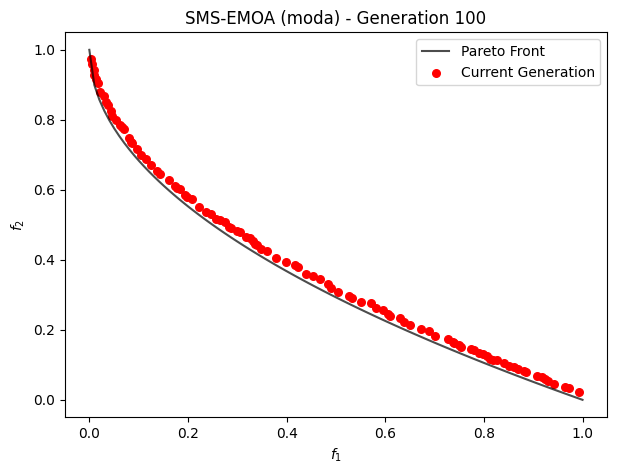

In [7]:
from pymoo.algorithms.moo.moda.sms_moda import SMSEMOA_MODA
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.optimize import minimize
from pymoo.problems import get_problem

# 1. Setup Problem and Run Optimization once
problem = get_problem("zdt1",  n_pareto_points= 100)
algorithm = SMSEMOA_MODA()
res = minimize(problem, algorithm, ('n_gen', 100), seed=1, save_history=True)

# 2. Setup the Figure for Animation
fig, ax = plt.subplots(figsize=(7, 5))
pf = problem.pareto_front()
ax.plot(pf[:, 0], pf[:, 1], color="black", alpha=0.7, label="Pareto Front")
scatter = ax.scatter([], [], color="red", s=30, label="Current Generation")

ax.set_title("SMS-EMOA Convergence (wfg)")
ax.set_xlabel("$f_1$")
ax.set_ylabel("$f_2$")
ax.legend()

# 3. Define the Update Function
def update(frame):
    print(frame)
    # Get the population objectives at this generation
    F = res.history[frame].opt.get("F")
    scatter.set_offsets(F)
    ax.set_title(f"SMS-EMOA (moda) - Generation {frame + 1}")
    return scatter,

# 4. Create and Show Animation
# interval is delay between frames in milliseconds
ani = FuncAnimation(fig, update, frames=len(res.history), interval=50, blit=True)
ani.save('smsemoa_moda.mp4')
plt.show()